In [82]:
import create_data
import kmeans
import voltage
import os
import importlib
import time
import bpf
from matplotlib.pyplot import hist
import numpy as np

In [83]:
importlib.reload(create_data)
importlib.reload(kmeans)
importlib.reload(voltage)
importlib.reload(bpf)

<module 'bpf' from 'C:\\Users\\avigh\\Documents\\python\\VoltageDimentionalReduction\\code\\bpf.py'>

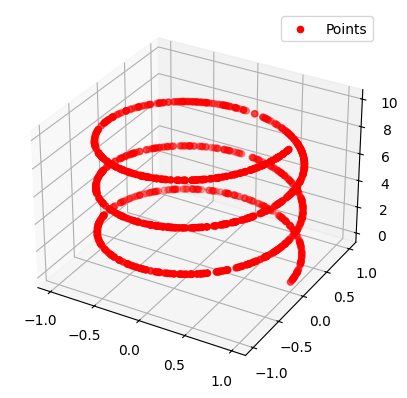

In [143]:
spiral = create_data.Data("spiral.json", stream=False)
spiral.plot("spiral.png")

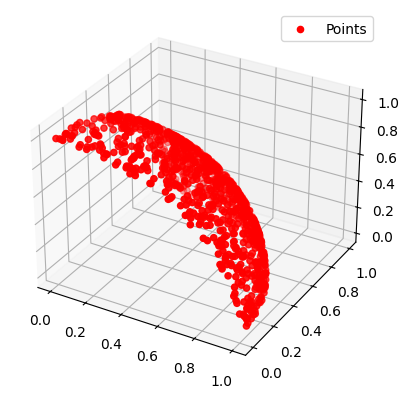

In [31]:
eigth_sphere = create_data.Data("../inputoutput/data/eigth_sphere.json", stream=False)
eigth_sphere.plot("eight_sphere.png")

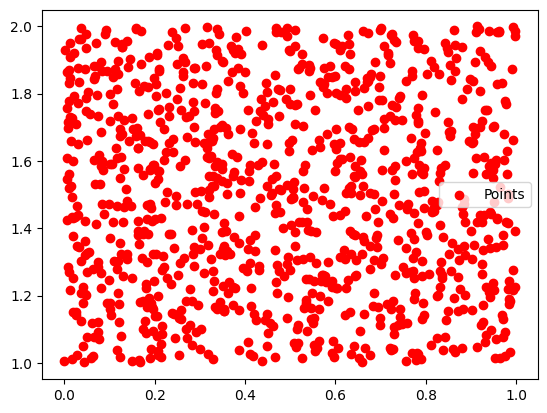

In [35]:
square_data = create_data.Data("../inputoutput/data/square_fill.json", stream=False)
square_data.plot()

In [36]:
k = 100

partitions = kmeans.Partitions(eigth_sphere)
partitions.k_means(k, seed=time.time())

# partitions.plot(name="eigth_sphere_kmeans.png")

In [37]:
# landmarks = [Landmark(getClosestTo(partitions.centers, [0, 0]), 1), Landmark(getClosestTo(partitions.centers, [2, 2]), 0)]
# landmarks = [voltage.Landmark(getClosestTo(partitions.centers, [0.5, 1.5]), 1)]
# landmarks = [voltage.createLandmarkClosestTo(partitions.centers, [1, 0], 1), voltage.createLandmarkClosestTo(partitions.centers, [0, 1], 1)]
# landmarks = [voltage.createLandmarkClosestTo(partitions.centers, [1, 0, 0], 1), 
#              voltage.createLandmarkClosestTo(partitions.centers, [0, 1, 0], 1), 
#              voltage.createLandmarkClosestTo(partitions.centers, [0, 0, 1], 1)]

landmarks = [voltage.createLandmarkClosestTo(partitions.centers, [1, 0, 0], 1)]

In [88]:
# c, p_g = voltage.bestParameterFinder(voltage.gaussiankernel, landmarks, partitions, mantissa=True, divisions=3)
# c, p_g = voltage.bestParameterFinder(voltage.gaussiankernel, landmarks, partitions, emin=-4, emax=0, mantissa=True, divisions=3, L=0)
c, p_g = bpf.bestParameterFinder(voltage.gaussiankernel, landmarks, partitions, metric=bpf.nInfUniform, emin=-6, emax=-1, mantissa=False, divisions=3)
print(c, p_g)

# print(partitions.centers[most_central_index])

0.1 0.0001


In [89]:
# c = bestCFinder(radialkernel, landmarks, partitions)

landmarkSolver = voltage.Solver(partitions.centers)
landmarkSolver.setPartitionWeights(voltage.gaussiankernel, partitions, c)
landmarkSolver.addUniversalGround(p_g=p_g)
landmarkSolver.addLandmarks(landmarks)
v = landmarkSolver.compute_voltages()
print(v)
min(v)

[0.35673141 0.4285289  0.44327142 0.35963874 0.37612468 0.69629288
 0.36763549 0.37433355 0.55800047 0.41202837 0.3504562  0.35775515
 0.386335   0.39909534 0.35599461 0.48605027 0.38923567 0.48572228
 0.35516949 0.36048599 0.50899941 0.36990383 0.35970932 0.77773378
 0.35594098 0.5728958  0.42558354 0.41375694 0.36566089 0.4500258
 0.36911942 0.40525326 0.36006391 0.37828661 0.38205958 0.43368238
 0.47886768 0.55446819 0.37560911 0.412333   0.37727374 0.36075525
 0.35392874 0.35552103 0.45125321 0.48211035 0.38606823 0.3580308
 0.39413001 0.52769145 0.37811693 0.36517962 0.35468446 0.39689471
 0.358704   0.43491509 0.54146873 0.35202814 0.35366598 0.35616709
 0.35778616 0.39637661 0.37014101 0.36411359 0.36839568 1.
 0.46131748 0.60730294 0.35320602 0.37961151 0.46438642 0.59987848
 0.51153208 0.50415442 0.35883382 0.41484161 0.3962962  0.41322623
 0.45035717 0.35598323 0.6310064  0.39840269 0.44931667 0.39501642
 0.35614703 0.36688739 0.36792454 0.38492311 0.45479806 0.42274619
 0.37

np.float64(0.3504562001812267)

(array([16., 13., 10.,  6.,  6.,  4.,  2.,  5.,  1.,  5.,  0.,  2.,  2.,
         1.,  1.,  4.,  1.,  2.,  0.,  1.,  3.,  0.,  0.,  1.,  2.,  0.,
         0.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.3504562 , 0.35695164, 0.36344708, 0.36994251, 0.37643795,
        0.38293339, 0.38942883, 0.39592427, 0.4024197 , 0.40891514,
        0.41541058, 0.42190602, 0.42840146, 0.43489689, 0.44139233,
        0.44788777, 0.45438321, 0.46087865, 0.46737408, 0.47386952,
        0.48036496, 0.4868604 , 0.49335584, 0.49985127, 0.50634671,
        0.51284215, 0.51933759, 0.52583303, 0.53232846, 0.5388239 ,
        0.54531934, 0.5518

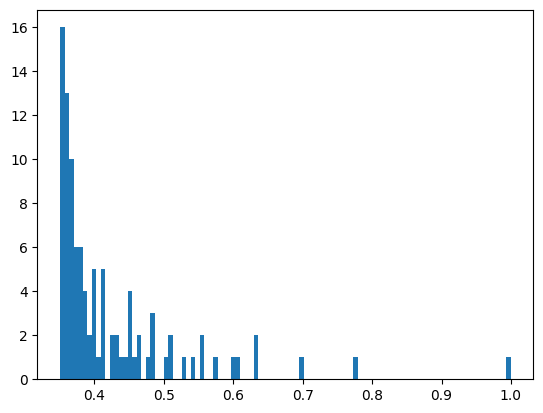

In [90]:
hist(v, bins=100)

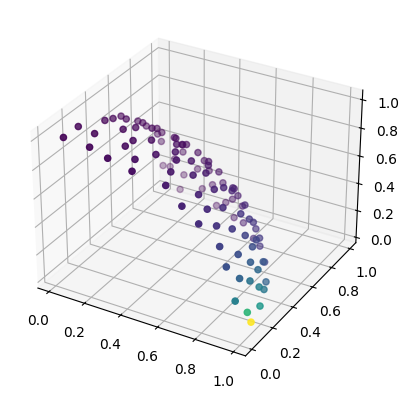

<Axes3D: >

In [91]:
landmarkSolver.plot(colored=True, name="eigth_sphere_voltages.png")

In [ ]:
solver = voltage.Solver(square_data)
solver.setWeights(voltage.radialkernel, c)
solver.addUniversalGround(p_g=p_g)
solver.addLandmarks(landmarks)
solver.compute_voltages()

In [ ]:
solver.plot(colored=False)
solver.plot(colored=True)

In [152]:
voltages = [0 for i in range(len(square_data))]

for index in range(k):
    closestIndicies = partitions.getClosestPoints(index)
    closeLandmarksIndicies = []

    for pair in partitions.voronoi.ridge_points:
        if pair[0] == index:
            closeLandmarksIndicies.append(pair[1])
        if pair[1] == index:
            closeLandmarksIndicies.append(pair[0])

    closeLandmarks = []
    for cli in closeLandmarksIndicies:
        closeLandmarks.append(voltage.Landmark(cli, landmarkVoltages[cli]))

    localSolver = Solver(data.getSubSet(closestIndicies))
    localSolver.setWeights(kernel=gaussiankernel, c=c)
    localSolver.addLandmarks(closeLandmarks)
    localVoltages = localSolver.compute_voltages()

    for i, v in zip(closestIndicies, localVoltages):
        voltages[i] = v

NameError: name 'landmarkVoltages' is not defined

In [ ]:
temp = Solver(data)
temp.voltages = voltages
%matplotlib widget
temp.plot()

In [ ]:
line_data = create_data.Data("line.json", stream=True)
n = len(line_data)

X0 = []
X1 = []

for index, point in enumerate(line_data):
    if point[0] < 1:
        X0.append(voltage.Landmark(index, 0))
    if point[0] > 2:
        X1.append(voltage.Landmark(index, 1))

In [ ]:
ungrounded = voltage.Solver(line_data)
ungrounded.setWeights(kernel=voltage.gaussiankernel, c=0.03)
ungrounded.addLandmarks(X0)
ungrounded.addLandmarks(X1)
voltages = ungrounded.compute_voltages()

ax = ungrounded.plot(color='r', label="Ungrounded Points")

In [ ]:
grounded = voltage.Solver(line_data)
grounded.setWeights(kernel=voltage.gaussiankernel, c=0.3)
grounded.addUniversalGround()
grounded.addLandmarks(X1)
grounded_voltage = grounded.compute_voltages()

ax = grounded.plot(color='b', label="Grounded Points")

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
points_2d = pca.fit_transform(points_array)

plt.scatter(points_2d[:, 0], points_2d[:, 1])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Solver Outputs")
plt.show()

plt.savefig(name + "_PCA.png")

NameError: name 'points_array' is not defined

In [3]:
from sklearn.datasets import fetch_openml
import numpy as np

In [4]:
print("Loading Data...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(np.int64)

# data = create_data.Data(np.array(X))

Loading Data...


In [6]:
landmarks = []
subDivision = {}
summation = {}
count = {}

print("Sorting and averaging...")

for xi, yi in zip(X, y):
    if yi in summation:
        subDivision[yi].append(np.array(xi))
        summation[yi] += np.array(xi)
        count[yi] += 1
    else:
        subDivision[yi] = [np.array(xi)]
        summation[yi] = np.array(xi)
        count[yi] = 1

Sorting and averaging...


In [21]:
print("Kmeans...")

k = 100
data = []

for yi in range(10):
    print(yi)
    
    partitions = kmeans.Partitions(subDivision[yi])
    partitions.k_means(k, seed=time.time())

    landmarks.append(voltage.createLandmarkClosestTo(partitions.centers, summation[yi] / count[yi], 1))
    data += list(partitions.centers)

# data = create_data.Data(data)
print(len(data))

partitions = kmeans.Partitions(data)
partitions.k_means(k, seed=time.time())

Kmeans...
0
1
2
3
4
5
6
7
8
9
1000


In [24]:
print("Parameter Finding...")

c, p_g = voltage.bestParameterFinder(voltage.gaussiankernel, landmarks, partitions, emin=-100, emax=-90, mantissa=False, L=0)
print(c, p_g)
# localvoltagesolver.localSolver(data, landmarks, c, p_g)

Parameter Finding...
1e-100 1e-100


C:\Users\avigh\AppData\Local\Temp\ipykernel_25472\3445588363.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", 10)  # Use a colormap with enough color


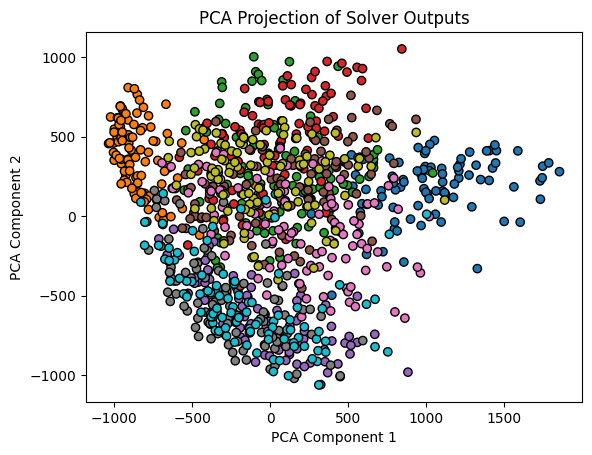

<Figure size 640x480 with 0 Axes>

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
points_2d = pca.fit_transform(data)

colors = plt.cm.get_cmap("tab10", 10)  # Use a colormap with enough color
color_indices = np.arange(len(data)) // k

plt.scatter(points_2d[:, 0], points_2d[:, 1], c=color_indices, cmap=colors, edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of raw MNIST data")
plt.show()

plt.savefig("../inputoutput/matplotfigures/MNIST_PCA.png")

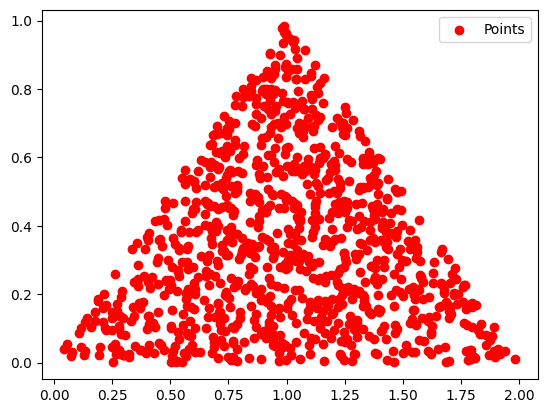

In [9]:
triangle = create_data.Data("../inputoutput/data/triangle.json", stream=False)
triangle.plot("../inputoutput/matplotfigures/triangle.png")

In [41]:
voltages = np.array([1, 2, 3])
np.array(voltages.sort())
np.array([x / (len(voltages) - 1) for x in range(len(voltages))])
np.array([np.pow(10, (x / (len(voltages) - 1)) - 1) for x in range(len(voltages))])

array([0.1       , 0.31622777, 1.        ])

In [42]:
np.std(voltages)

np.float64(0.816496580927726)